In [21]:
import pandas as pd
import numpy as np
import os

In [50]:
# constants
logsRootPath = '../out/build/x64-Release/output/'
logsNamePrefix = 'RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32'
featureList = ["frame", "MSE", "rBias", "StdDev", "Loss"]
maxFrameCount = 200

In [51]:
df = pd.DataFrame(0, index=np.arange(maxFrameCount), columns=featureList) 
suitableLogCounter = 0

logsDirs = os.listdir(logsRootPath)

# average collected data between different runs
for dir in logsDirs:
    if logsNamePrefix in dir:
        print('Found suitable log folder {}'.format(dir))
        tempDf = pd.read_csv('{}{}/logNrc.txt'.format(logsRootPath, dir), sep=" ", header=None)
        tempDf.columns = featureList
        tempDf = tempDf[:maxFrameCount]
        df = df.add(tempDf, fill_value=0)
        suitableLogCounter += 1

if suitableLogCounter > 0:
    df = df.div(suitableLogCounter)

Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-42-56)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-43-21)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-43-43)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-44-05)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-44-24)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-44-45)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32(20-03-2024_21-45-07)
Found suitable log folder RelativeL2Luminance_Adam_0.010000_0.

In [52]:
display(df)

,frame,MSE,rBias,StdDev,Loss
0,0.0,0.373402,-0.539496,4.049547,0.400670
1,1.0,0.355881,-0.416705,3.931710,0.353597
2,2.0,0.370483,-0.455171,3.863825,18.878802
3,3.0,0.375124,-0.507525,3.743177,5.550156
4,4.0,0.373530,-0.569171,3.671194,12.047629
...,...,...,...,...,...
195,195.0,0.379750,-0.551106,3.579144,1.194545
196,196.0,0.386926,-0.547438,3.580374,1.562353
197,197.0,0.389177,-0.570524,3.601923,1.401305
198,198.0,0.380961,-0.548004,3.594061,1.342232


<Axes: xlabel='frame'>

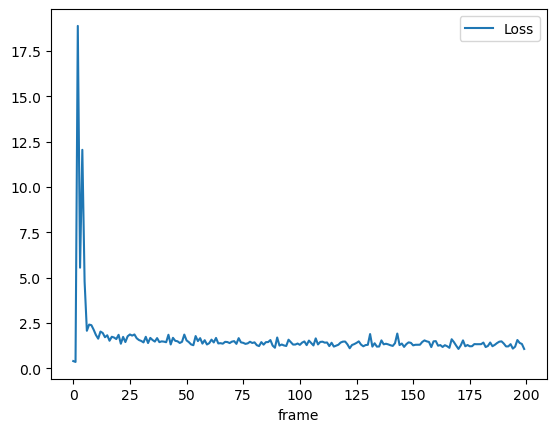

In [53]:
df.plot.line(x='frame', y='Loss')

<Axes: xlabel='frame'>

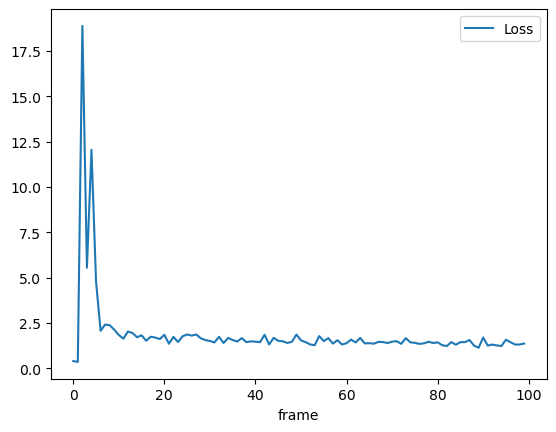

In [56]:
dataSlice = df[:100]
dataSlice.plot.line(x='frame', y='Loss')